In [10]:
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import seaborn as sns

In [11]:
def max_value(inputlist):
    return max([int(sublist[-1]) for sublist in inputlist])
    
def min_value(inputlist):
    return min([int(sublist[-1]) for sublist in inputlist])

In [12]:
# load CLIP features
with open('extracted/features_clip.pkl', 'rb') as f:
    data=pickle.load(f)
with open('extracted/labels_clip.pkl', 'rb') as f:
    label=pickle.load(f)

# load baseline features
# with open('extracted/features_baseline.pkl', 'rb') as f:
#     data=pickle.load(f)
# with open('extracted/labels_baseline.pkl', 'rb') as f:
#     label=pickle.load(f)

In [17]:
wrong_predictions=[]

svm_train_top_k_accuracy_scores=[]
svm_test_top_k_accuracy_scores=[]

ridge_train_top_k_accuracy_scores=[]
ridge_test_top_k_accuracy_scores=[]

false = {'squirrel': 0,'chicken': 0,'duck': 0}
total_animals = {'squirrel': 0,'chicken': 0,'duck': 0}

animals = []

In [18]:
for subject in range(min_value(label), max_value(label)+1):
    for animal in ['chicken', 'duck', 'squirrel']:
        X_train = []
        X_test = []
        y_train = []
        y_test = []
        testperson = 0

        for idx in range(len(data)):
            if label[idx][2] == str(subject) and label[idx][0] == animal:
                X_test.append(data[idx])
                y_test.append(label[idx][0])
                testperson = subject
            else:
                X_train.append(data[idx])
                y_train.append(label[idx][0])

        if X_train and X_test and y_train and y_test:
            
            ## Ridge
            clf = RidgeClassifier()
            clf.fit(X_train, y_train)

            Y_train_pred_ridge = clf.predict(X_train)
            Y_test_pred_ridge = clf.predict(X_test)

            ridge_train_top_k_accuracy_scores.append(accuracy_score(y_train,Y_train_pred_ridge))
            ridge_test_top_k_accuracy_scores.append(accuracy_score(y_test,Y_test_pred_ridge))

            ## SVC
            clf = SVC(C=100)
            clf.fit(X_train, y_train)

            Y_train_pred_svc = clf.predict(X_train)
            Y_test_pred_svc = clf.predict(X_test)

            svm_train_top_k_accuracy_scores.append(accuracy_score(y_train,Y_train_pred_svc))
            svm_test_top_k_accuracy_scores.append(accuracy_score(y_test,Y_test_pred_svc))

            total_animals[animal] += 2
            animals.append(animal)
            
            # change to Y_test_pred_ridge for Ridge classification results
            if not np.array_equal(Y_test_pred_svc, y_test):
                print('Person:',testperson)
                print('Test:',y_test)
                print('SVC pred:', Y_test_pred_svc)
                false[animal] += 1

Person: 11
Test: ['squirrel', 'squirrel']
SVC pred: ['duck' 'squirrel']
Person: 17
Test: ['squirrel', 'squirrel']
SVC pred: ['duck' 'squirrel']
Person: 18
Test: ['chicken', 'chicken']
SVC pred: ['chicken' 'squirrel']
Person: 18
Test: ['duck', 'duck']
SVC pred: ['duck' 'squirrel']
Person: 18
Test: ['squirrel', 'squirrel']
SVC pred: ['squirrel' 'duck']
Person: 19
Test: ['duck', 'duck']
SVC pred: ['squirrel' 'duck']
Person: 19
Test: ['squirrel', 'squirrel']
SVC pred: ['squirrel' 'duck']


In [15]:
print(false)
print(total_animals)

{'squirrel': 4, 'chicken': 1, 'duck': 2}
{'squirrel': 42, 'chicken': 42, 'duck': 42}


In [21]:
# change Accuracy list to ridge_test_top_k_accuracy_scores for Ridge results
df = pd.DataFrame({'Category': animals, 'Accuracy': svm_test_top_k_accuracy_scores})

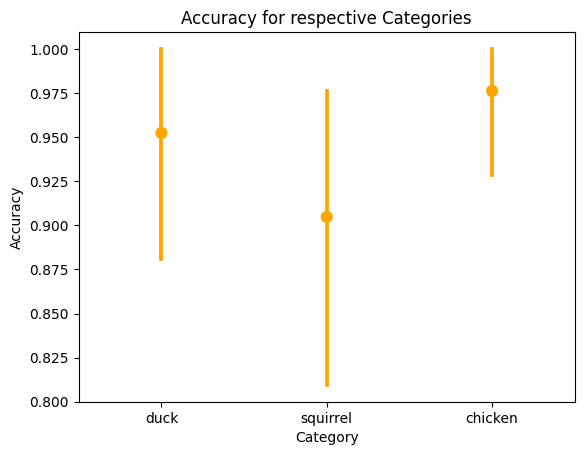

In [22]:
ax = sns.pointplot(df, x='Category', y='Accuracy', color='orange', order=['duck', 'squirrel', 'chicken'], linestyles='')
_ = ax.set_title('Accuracy for respective Categories')